<h2 align="center">Завдання №1: Реалізація типу "множина"</h1>

#### Мета роботи
    Опанувати способи представлення множини та їх ефективної реалізації, проаналізувати швидкість роботи операцій над множинамиу заданій реалізації.

#### Основне завдання

1. Реалізувати тип "множинна" одним із способів, згідно з варіантом.
2. Реалізувати базові операції над множинами: включення елементу у множину (Insert), видалення елементу з множини (Delete), перевірку наявності елементу в множині (Search), очистку множини (Clear).
3. Реалізувати додаткові операції над множинами: об'єднання множини (Union), перетин множин (Intersection), різницю множин (SetDifference), симетричну різницю множин (SymDifference), перевріку, чи є одна множина підсножинною іншої (IsSubset).
4. Провести експерементальне визначення часу роботи операцій в залежності від розміру множини.

#### Варіант №1
Реалізація множини за допомогою списків. Елементи можуть бути довільними та різнорідними (необмежений універсум)

Зауважимо, що для коректної оцінки часу виконання необхідно орієнтуватись на такі вимоги:

1. Замір часу необхідно виконувати на виподкових даних, і для кожного експеременту та фіксованих значеннях параметрів необхідно провести щонайменше 1000 експерементій; підсумкове знаення часу є усередненням від усіх замірів.
2. Далі для експерементів (тобто, випадкові множини заданого розміру) необхідно згенерувати заздалегіть, щоб час генерування не включався у замір.
3. Для аналізу операції Search доцільно розглядати окремо випадки пошуку елементу, який є у множині, та якого у множині нема.
4. Одержані результати зручно подавати у вигляді графіка "Розмір мнодини - Час виконання операції"

In [95]:
from __future__ import annotations
import matplotlib.pyplot as plt
import numpy as np
import copy
import time

print("Setup complete")

Setup complete


Для виконання завдання було вирішено використовувати LinkedList як список, яким задають множину

In [93]:

# LimkedList
class Node:
    next_node: Node = None
    def __init__(self, val) -> None:
        self.val = val
        

class ListSet:
    First: Node = None

    def Search(self, search_val) -> bool:
        current_node = self.First
        while current_node:
            if current_node.val == search_val:
                return True
            else:
                current_node = current_node.next_node
        return False

    def Insert(self, val) -> None:
        new_node = Node(val)
        if self.First is None:
            self.First = new_node
            return

        current_node = self.First
        while current_node.next_node:
            if current_node.val == val:
                return
            else:
                current_node = current_node.next_node
        if current_node.val != val:
            current_node.next_node = new_node
    
    def Clear(self):
        self.First = None

    def Delete(self, val) -> None:
        current_node = self.First

        if current_node.val == val:
            if current_node.next_node is None:
                self.Clear()
            else:
                self.First = self.First.next_node
        while current_node.next_node is not None:
            if current_node.next_node.val == val:
                break
            current_node = current_node.next_node

        if current_node.next_node:
            current_node.next_node = current_node.next_node.next_node


    def __str__(self) -> str:
        current_node = self.First
        res_str = "{"
        while current_node:
            res_str += " "+str(current_node.val)
            current_node = current_node.next_node
        res_str += "}"
        return res_str
            
            

In [94]:
Test = ListSet()
Test.Insert('a')
print(Test)
print(Test.Search('a'))
print(Test.Search('A'))
Test.Insert('a')
Test.Insert('A')
print(Test)
Test.Delete('b')
Test.Delete('A')
print(Test)
Test.Clear()
print(Test)

{ a}
True
False
{ a A}
{ a}
{}


In [52]:
A = ListSet()
A.Insert(1)
A.Insert(2)
A.Insert(3)
A.Insert(4)
A.Insert(5)
A.Insert(6)
print(f"A:{A}")
B = ListSet()
B.Insert(3)
B.Insert(4)
B.Insert(5)
B.Insert(6)
B.Insert(7)
B.Insert(8)
B.Insert(9)
print(f"B:{B}")

A:{ 1 2 3 4 5 6}
B:{ 3 4 5 6 7 8 9}


In [53]:
def Union(A: ListSet, B: ListSet) -> ListSet:
    B_node = B.First
    res = copy.deepcopy(A)
    while B_node:
        if not A.Search(B_node.val):
            res.Insert(B_node.val)
        B_node = B_node.next_node
        
    return res
    

In [54]:
print(Union(A, B))

{ 1 2 3 4 5 6 7 8 9}


In [55]:
def Intersection(A: ListSet, B: ListSet) -> ListSet:
    B_node = B.First
    res = ListSet()
    while B_node:
        if A.Search(B_node.val):
            res.Insert(B_node.val)
        B_node = B_node.next_node
    return res
    

In [56]:
print(Intersection(A, B))

{ 3 4 5 6}


In [57]:
def SetDifference(A: ListSet, B: ListSet) -> ListSet:
    B_node = B.First
    res = copy.deepcopy(A)
    while B_node:
        if A.Search(B_node.val):
            res.Delete(B_node.val)
        B_node = B_node.next_node
    return res
    

In [8]:
print(SetDifference(A, B))

{ 1 2}


In [9]:
def SymDifference(A: ListSet, B: ListSet) -> ListSet:
    return SetDifference(Union(A, B), Intersection(A, B))
    

In [58]:
print(SymDifference(A, B))

{ 1 2 7 8 9}


In [70]:
def IsSubset(A: ListSet, B: ListSet) -> bool:
    current_node = A.First
    while current_node:
        if not B.Search(current_node.val):
            return False
        current_node = current_node.next_node
    return True


In [71]:
print(IsSubset(A, B))
print(IsSubset(Intersection(A, B), B))

False
True


In [11]:
def make_numbers_for_set(size: int, amount: int) -> np.ndarray:
    start_numbers = np.arange(size)
    shuffled_numbers = []
    for i in range(amount):
        np.random.shuffle(start_numbers)
        shuffled_numbers.append(copy.deepcopy(start_numbers))
    return shuffled_numbers
    

In [12]:
make_numbers_for_set(10, 2)

[array([3, 7, 4, 2, 9, 5, 8, 1, 0, 6]), array([0, 3, 7, 4, 9, 1, 6, 5, 2, 8])]

In [13]:
def array2list(arr) -> ListSet:
    new_ListSet = ListSet()
    for a in arr:
        new_ListSet.Insert(a)
    return new_ListSet
    

In [14]:
print(array2list(np.arange(5)))

{ 0 1 2 3 4}


In [15]:
test_search = make_numbers_for_set(1000, 1000)
A = []
for a in test_search:
    A.append(array2list(a))
print(A[0])

{ 288 447 169 15 137 220 90 168 925 226 279 546 582 690 954 534 490 38 635 284 685 742 786 761 913 117 348 278 652 587 758 156 316 481 811 158 583 269 333 624 153 694 575 737 967 608 211 876 616 736 607 684 983 993 502 830 204 129 195 455 930 863 818 394 419 806 674 283 83 735 6 721 110 661 11 398 496 274 260 225 417 42 440 238 916 84 693 808 854 308 365 609 848 579 317 331 196 383 198 29 746 836 170 357 298 180 740 268 89 601 61 258 642 51 452 275 893 894 349 72 473 571 441 332 923 940 233 216 920 59 78 404 245 833 265 605 482 472 433 870 91 277 542 69 553 52 469 19 24 620 172 122 627 945 921 380 31 234 164 492 976 30 602 733 700 779 88 304 343 949 320 467 301 743 843 533 77 480 858 384 353 382 138 813 250 544 41 680 182 688 712 12 312 395 334 678 560 307 656 454 428 432 619 479 896 900 541 36 822 961 898 829 151 638 303 753 463 116 381 223 477 372 710 701 777 699 600 271 974 804 50 828 655 667 240 340 517 62 986 475 67 510 791 912 201 726 68 629 980 48 969 897 289 654 760 944 857 992

In [16]:
start_time = time.time()
for a in A:
    a.Search(0)

print((time.time()-start_time)/1000)

3.766322135925293e-05


In [17]:
start_time = time.time()
for a in A:
    a.Search(1000)
    
print((time.time()-start_time)/1000)

4.994750022888184e-05


Отже запишемо все в одну функцію, яка буде приймати розмір масиву та кількість повторень

In [18]:
def research_search(size: int, amount: int, search_value) -> float:
    test_search = make_numbers_for_set(size, amount)
    A = []
    for a in test_search:
        A.append(array2list(a))
    start_time = time.time()
    for a in A:
        a.Search(search_value)
        
    return (time.time()-start_time)/amount

In [19]:
research_search(1000, 1000, 1000)

5.4430484771728516e-05

Час для графіку

In [37]:
X = np.arange(1, 301)
Y = []
for x in X:
    Y.append(research_search(x, 1000, 0))


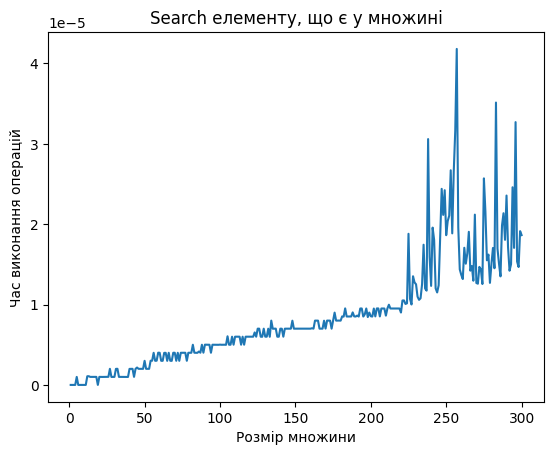

In [97]:
plt.title("Search елементу, що є у множині")
plt.xlabel("Розмір множини")
plt.ylabel("Час виконання операцій")
plt.plot(X, Y)

In [45]:
X_ = np.arange(1, 301)
Y_ = []
for x in X_:
    Y_.append(research_search(x, 1000, 501))

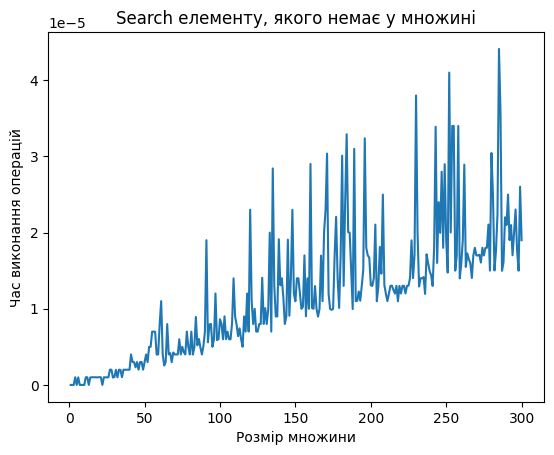

In [98]:
plt.title("Search елементу, якого немає у множині")
plt.xlabel("Розмір множини")
plt.ylabel("Час виконання операцій")
plt.plot(X_, Y_)

In [21]:
np.random.choice(10, 9, replace=False)
set_for_B = []
for i in range(1000):
    set_for_B.append(np.random.choice(10_000, 1000, replace=False))
set_for_C = []
for i in range(1000):
    set_for_C.append(np.random.choice(10_000, 1000, replace=False))

In [22]:
B = []
for b in set_for_B:
    B.append(array2list(b))

C = []
for c in set_for_C:
    C.append(array2list(c))

In [23]:
start_time = time.time()
for i in range(1000):
    Intersection(B[i], C[i])

print((time.time()-start_time)/1000)

0.03737307167053223


Аналогічно як і з дослідженням функції *Search*

In [24]:
def research_interseaction(size: int, amount: int) -> float:

    set_for_B = []
    for i in range(amount):
        set_for_B.append(np.random.choice(size*10, size, replace=False))
    set_for_C = []
    for i in range(amount):
        set_for_C.append(np.random.choice(size*10, size, replace=False))

    B = []
    for b in set_for_B:
        B.append(array2list(b))

    C = []
    for c in set_for_C:
        C.append(array2list(c))

    start_time = time.time()
    for i in range(amount):
        Intersection(B[i], C[i])

    return (time.time()-start_time)/amount


In [25]:
research_interseaction(1000, 1000)

0.035779557466506955

In [43]:
X_intersection = np.arange(1, 101)
Y_intersection = []
for x in X_intersection:
    Y_intersection.append(research_interseaction(x, 1000))

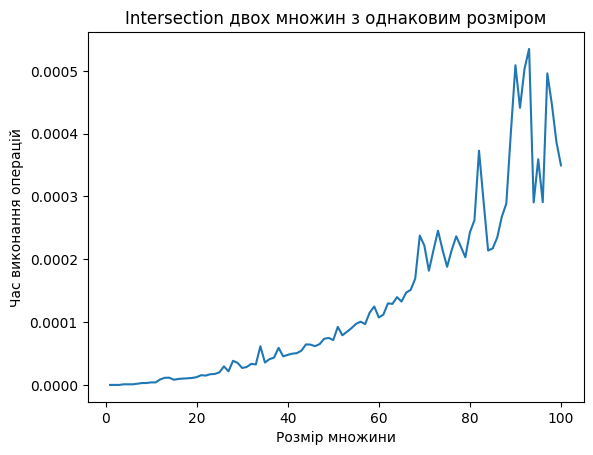

In [99]:
plt.title("Intersection двох множин з однаковим розміром")
plt.xlabel("Розмір множини")
plt.ylabel("Час виконання операцій")
plt.plot(X_intersection, Y_intersection)